# Regressão Logística I
## Tarefa I

Neste exercício vamos trabalhar com a base "Heart Disease Data Set" disponível no site do [UCI](https://archive.ics.uci.edu/ml/datasets/heart+disease).

Temos 303 indivíduos e vamos utilizar 13 variáveis disponíveis para prever a presença de doença cardíaca na variável ```num```(a 14$^a$ variável).

A descrição das variáveis está recortada abaixo:
- age: idade do paciente em anos
- sex: sexo (1 = male; 0 = female)  
- cp: tipo de dor no peito
  - 1: angina típica
  - 2: angina atípica
  - 3: dor não-angina
  - 4: assintomático
- trestbps: pressão sanguínea em repouso (em mm Hg na admissão ao hospital
- chol: colesterol sérico em mg/dl
- fbs: (açúcar no sangue em jejum > 120 mg/dl) (1 = True; 0 = False)
- restecg: resultados eletrocardiográficos em repouso
  - 0: normal
  - 1: tendo anormalidade da onda ST-T (Inversões de onda T e / ou ST com elevação ou depressão de > 0.05 mV)
  - 2: mostrando hipertrofia ventricular esquerda provável ou definitiva pelos critérios de Estes
- thalach: frequência cardíaca máxima alcançada
- exang: angina induzida por exercício(1 = sim; 0 = não)
- oldpeak = Depressão de ST induzida por exercício em relação ao repouso
- slope: Depressão de ST induzida por exercício em relação ao repouso
  - 1: inclinação ascendente
  - 2: estável
  - 3: inclinação descendente
- ca: número de vasos principais (0-3) coloridos por fluorosopia
- thal: 3 = normal; 6 = defeito corrigido; 7 = defeito reversível
- num: diagnóstico de doença cardíaga (status de doença angiográfica)

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import statsmodels.formula.api as smf

In [3]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'

df = pd.read_csv(url, 
                 names=['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
                        'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [4]:
df['flag_doente'] = (df['num'] != 0).astype('int64')

1. Monte uma bivariada para a variável ```sex``` com as seguintes estatísticas:

- Número de *saudáveis*
- Número de *doentes*
- Total
- Quantidade média de doentes
- *Odds*
- *Odds ratio* (Use o total como referência)
- Logito (LOG(*Odds*))
- O LOG do *Odds ratio* (com o total como referência) é chamado de *Weight of Evidence* (WOE). Calcule-o.

In [5]:
df['sex'] = df['sex'].map({1 : 'masculino' , 0: 'feminino'})

In [6]:
sex_est = pd.crosstab(df['sex'] , df['flag_doente'] , margins = True)

In [7]:
sex_est = sex_est.assign(
    media_doentes=lambda x: x[1] / x['All'] * 100,
    Odds=lambda x: x[0] / x[1],
    Odds_ratio=lambda x: x['Odds'] / x.loc['All', 'Odds'],
    Logito=lambda x: np.log(x['Odds']),
    WOE=lambda x: np.log(x['Odds_ratio'])
)

In [8]:
sex_est

flag_doente,0,1,All,media_doentes,Odds,Odds_ratio,Logito,WOE
sex,,,,,,,,
feminino,72,25,97,25.773196,2.880000,2.440976,1.057790,0.892398
masculino,92,114,206,55.339806,0.807018,0.683997,-0.214410,-0.379802
All,164,139,303,45.874587,1.179856,1.000000,0.165392,0.000000


2. Monte uma bivariada para a variável ```age``` com as seguintes estatísticas:
- Categorize a variável em 5 grupos
- Calcule as mesmas quantidades calculadas no execício anterior
- Calcule também o valor médio da variável ```age```

In [9]:
df['faixa_idade'] = pd.cut(df['age'] , bins =5)

In [10]:
age_est = pd.crosstab(df['faixa_idade'] , df['flag_doente'] , margins = 'True')

In [37]:
age_est = age_est.assign(
    media_doentes=lambda x: x[1] / x['All'] * 100,
    Odds=lambda x: x[0] / x[1],
    Odds_ratio=lambda x: x['Odds'] / x.loc['All', 'Odds'],
    Logito=lambda x: np.log(x['Odds']),
    WOE=lambda x: np.log(x['Odds_ratio']),
    media_idade = df.groupby('faixa_idade')['age'].mean())

C:\Users\g_abi\AppData\Local\Temp\ipykernel_17004\1414841981.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  media_idade = df.groupby('faixa_idade')['age'].mean())


In [36]:
age_est

flag_doente,0,1,All,media_doentes,Odds,Odds_ratio,Logito,WOE,media idade
faixa_idade,,,,,,,,,
"(28.952, 38.6]",8,3,11,27.272727,2.666667,2.260163,0.980829,0.815437,35.181818
"(38.6, 48.2]",50,21,71,29.577465,2.380952,2.018002,0.867501,0.702108,43.704225
"(48.2, 57.8]",56,41,97,42.268041,1.365854,1.157644,0.311780,0.146387,53.567010
"(57.8, 67.4]",40,67,107,62.616822,0.597015,0.506007,-0.515813,-0.681206,61.775701
"(67.4, 77.0]",10,7,17,41.176471,1.428571,1.210801,0.356675,0.191282,70.529412
All,164,139,303,45.874587,1.179856,1.000000,0.165392,0.000000,NaN


3. Visualize a informação da bivariada construída acima através de um gráfico da sua escolha.

<Axes: xlabel='faixa_idade'>

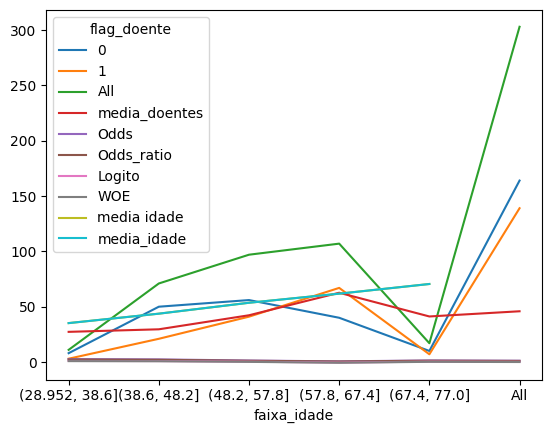

In [39]:
age_est.plot()